In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False


import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError,URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')
from patsy import dmatrix, dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
result_corona = pd.read_csv("checkpoint/result_checkpoint.csv", thousands = ",", index_col = 0)
result_corona


result_corona.index_names = ["분기"]

In [3]:
result_corona

,3사 Mobile 매출,3사 PC매출,평균기온(°C),마케팅 비용,게임시장 규모
1Q2017,1.907603e+11,9.447470e+11,2.744561,1.858444e+11,2.049056e+12
2Q2017,5.611863e+11,7.456180e+11,17.886667,2.045050e+11,1.458523e+12
3Q2017,9.005560e+11,9.349635e+11,24.000000,2.372769e+11,2.051440e+12
4Q2017,8.958130e+11,7.834570e+11,7.394386,2.862413e+11,1.836915e+12
1Q2018,7.269950e+11,7.692030e+11,2.030175,2.416348e+11,2.473959e+12
2Q2018,5.324043e+11,7.308540e+11,17.555088,2.368410e+11,1.727453e+12
3Q2018,5.921097e+11,1.092198e+12,24.640351,2.473202e+11,1.923482e+12
4Q2018,5.627087e+11,7.497090e+11,7.538947,2.762086e+11,1.899634e+12
1Q2019,3.239240e+11,9.549040e+11,3.451228,2.448007e+11,2.228777e+12
2Q2019,3.402707e+11,8.318520e+11,17.073776,2.597875e+11,1.858589e+12


In [4]:
##### 기온 데이터 제외

df = result_corona.loc[:, ("3사 Mobile 매출", "3사 PC매출", "마케팅 비용", "게임시장 규모")]

In [5]:
df = pd.DataFrame(data = result_corona[12:])

In [6]:
df

,3사 Mobile 매출,3사 PC매출,평균기온(°C),마케팅 비용,게임시장 규모
1Q2020,1.048860e+12,1.593336e+12,4.849123,2.347716e+11,2.442203e+12
2Q2020,8.875083e+11,1.240709e+12,16.954737,2.838224e+11,2.261376e+12
3Q2020,1.356090e+12,1.453089e+12,23.112281,3.233597e+11,2.481031e+12
4Q2020,1.161611e+12,1.306676e+12,7.912281,3.749360e+11,2.317881e+12
1Q2021,9.742760e+11,1.815808e+12,4.052632,2.914224e+11,2.525152e+12
2Q2021,8.964657e+11,1.166518e+12,17.236268,3.873891e+11,2.181218e+12
3Q2021,8.974830e+11,1.553097e+12,24.183158,4.316472e+11,2.669047e+12


In [8]:
corona = pd.read_csv("data/corona2.csv") #코로나 데이터 출력(경수님 것)

In [9]:
corona = corona.loc[:,("일일확진자")]
corona = pd.DataFrame(data = corona)
corona.index = ["1Q2020","2Q2020","3Q2020","4Q2020","1Q2021","2Q2021","3Q2021"]
corona

,일일확진자
1Q2020,9886
2Q2020,2963
3Q2020,11038
4Q2020,37865
1Q2021,41877
2Q2021,54091
3Q2021,153555


In [10]:
df_m = pd.concat([df,corona], ignore_index=True, axis=1)
df_m.columns = ["삼사모바일매출","삼사PC매출","평균기온","마케팅비용","게임시장규모","코로나확진자"]
df_m = df_m.loc[:, ("삼사모바일매출", "삼사PC매출", "마케팅비용", "게임시장규모", "코로나확진자")]

# 데이터 병합 및 컬럼명 수정

In [10]:
df_m

,삼사모바일매출,삼사PC매출,마케팅비용,게임시장규모,코로나확진자
1Q2020,1.048860e+12,1.593336e+12,2.347716e+11,2.442203e+12,9886
2Q2020,8.875083e+11,1.240709e+12,2.838224e+11,2.261376e+12,2963
3Q2020,1.356090e+12,1.453089e+12,3.233597e+11,2.481031e+12,11038
4Q2020,1.161611e+12,1.306676e+12,3.749360e+11,2.317881e+12,37865
1Q2021,9.742760e+11,1.815808e+12,2.914224e+11,2.525152e+12,41877
2Q2021,8.964657e+11,1.166518e+12,3.873891e+11,2.181218e+12,54091
3Q2021,8.974830e+11,1.553097e+12,4.316472e+11,2.669047e+12,153555


## 1. 정규화

In [11]:
from sklearn.preprocessing import MinMaxScaler         

scaler = MinMaxScaler()
scaler.fit(df_m)
result_scaled = scaler.transform(df_m)

df_normed = pd.DataFrame(data = result_scaled, columns = df_m.columns)

print("변수들의 최솟값: \n", df_normed.min())
print("-----------------------------------------------------")
print("변수들의 최댓값: \n", df_normed.max())

변수들의 최솟값: 
 삼사모바일매출    0.0
삼사PC매출     0.0
마케팅비용      0.0
게임시장규모     0.0
코로나확진자     0.0
dtype: float64
-----------------------------------------------------
변수들의 최댓값: 
 삼사모바일매출    1.0
삼사PC매출     1.0
마케팅비용      1.0
게임시장규모     1.0
코로나확진자     1.0
dtype: float64


In [12]:
df_normed #코로나 데이터 포함 정규화

,삼사모바일매출,삼사PC매출,마케팅비용,게임시장규모,코로나확진자
0,0.344341,0.657361,0.000000,0.534992,0.045972
1,0.000000,0.114265,0.249146,0.164316,0.000000
2,1.000000,0.441361,0.449970,0.614585,0.053622
3,0.584962,0.215863,0.711944,0.280144,0.231765
4,0.185171,1.000000,0.287749,0.705030,0.258407
5,0.019116,0.000000,0.775198,0.000000,0.339513
6,0.021287,0.595387,1.000000,1.000000,1.000000


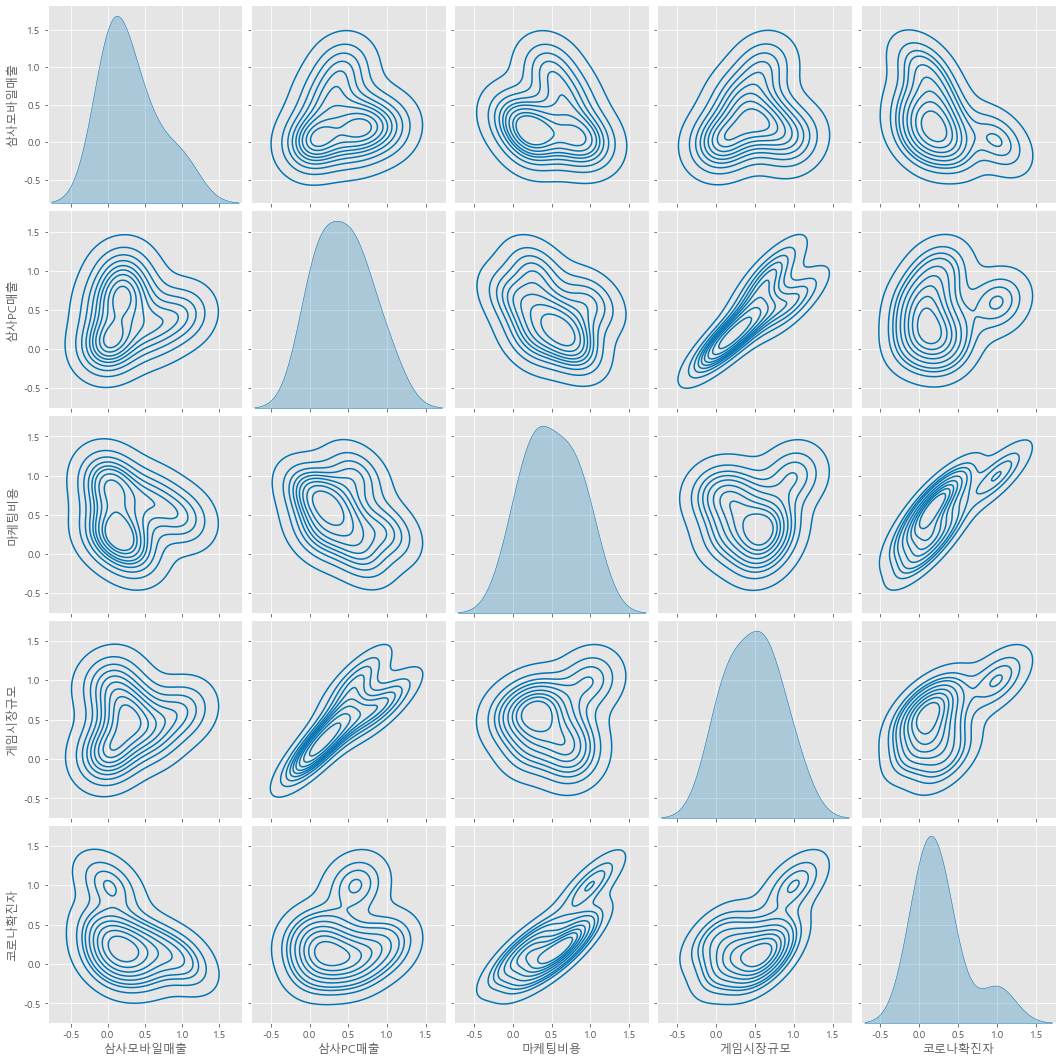

In [13]:
sns.set_palette('colorblind')
sns.pairplot(data=df_normed, height=3, kind="kde")            
# 산점도를 통해 변수간 관계 확인

<AxesSubplot:title={'center':'Heat Map'}>

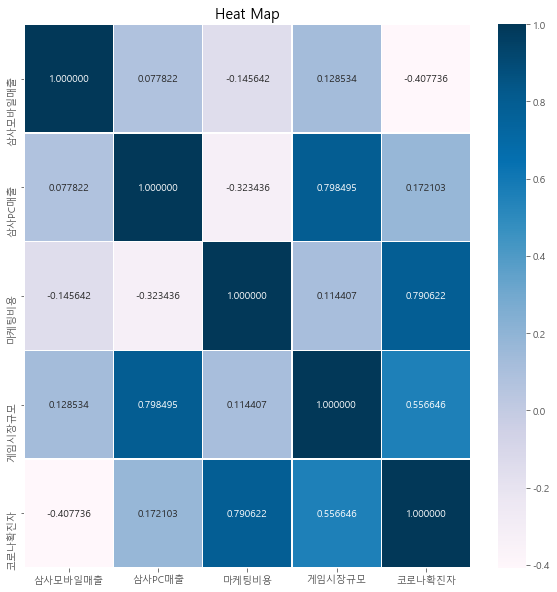

In [14]:
plt.figure(figsize=(10,10))
plt.title("Heat Map")
sns.heatmap(df_normed.astype(float).corr(), linewidth=0.5, cmap="PuBu", annot=True, fmt="f")

## OLS 검증

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
model = smf.ols(formula = '삼사PC매출 ~ 삼사모바일매출 + 마케팅비용 + 게임시장규모 + 코로나확진자', data = df_normed)
result = model.fit()
result.summary() 
# 3사 모바일 매출액과 영향을 줄 만한 유의미한 변수가 없음(유의수준 5%하에서..)

C:\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 삼사PC매출   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     2.293
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.326
Time:                        16:10:28   Log-Likelihood:                 3.9785
No. Observations:                   7   AIC:                             2.043
Df Residuals:                       2   BIC:                             1.773
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2470      0.498      0.496      0.669      -1.897       2.391
삼사모바일매출       -0.1218      0.832     -0.146      0.897      -3.700       3.457
마케팅비용         -0.3770      1.522     -0.248      0.827      -6.926       6.172
게임시장규모         0.9219      1.221      0.755      0.529      -4.332       6.176
코로나확진자        -0.0901      2.242     -0.040      0.972      -9.737       9.557
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.203
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.424
Skew:                           0.521   Prob(JB):                        0.809
Kurtosis:                       2.393   Cond. No.                         41.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+ F값 : 2.293
+ 각 p값 : 0.669/0.897/0.827/0.529/0.972
 - 모두 유의수준(0.05)보다 높아 독립변수 제거하여 p값 맞출 예정

In [17]:
model = smf.ols(formula = "삼사PC매출 ~ 삼사모바일매출 + 마케팅비용 + 코로나확진자", data = df_normed)
result = model.fit()
result.summary()

C:\Users\shine\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 삼사PC매출   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     3.346
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.174
Time:                        22:31:30   Log-Likelihood:                 3.1009
No. Observations:                   7   AIC:                             1.798
Df Residuals:                       3   BIC:                             1.582
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5887      0.193      3.049      0.055      -0.026       1.203
삼사모바일매출        0.4563      0.300      1.520      0.226      -0.499       1.412
마케팅비용         -1.4581      0.478     -3.051      0.055      -2.979       0.063
코로나확진자         1.5473      0.526      2.943      0.060      -0.126       3.220
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.378
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.286
Skew:                           1.349   Prob(JB):                        0.319
Kurtosis:                       3.749   Cond. No.                         9.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+ 삼사모바일매출을 제외하고는 p값이 0.05에 근접
+ 다중공선성(Cond.No) 도 10 이하(9.31) 이므로 이걸로 진행

In [18]:
X = df_normed[['마케팅비용', '삼사모바일매출', '코로나확진자']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(df_normed['삼사PC매출'], X).fit()
olsmod.summary()

C:\Users\shine\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 삼사PC매출   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     3.346
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.174
Time:                        22:31:35   Log-Likelihood:                 3.1009
No. Observations:                   7   AIC:                             1.798
Df Residuals:                       3   BIC:                             1.582
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5887      0.193      3.049      0.055      -0.026       1.203
마케팅비용         -1.4581      0.478     -3.051      0.055      -2.979       0.063
삼사모바일매출        0.4563      0.300      1.520      0.226      -0.499       1.412
코로나확진자         1.5473      0.526      2.943      0.060      -0.126       3.220
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.378
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.286
Skew:                           1.349   Prob(JB):                        0.319
Kurtosis:                       3.749   Cond. No.                         9.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 모델 검증

+ 삼사PC매출 = 0.5887 + 0.4563삼사모바일 매출 - 1.4581마케팅비용 + 1.5473코로나확진자 ########

### 선형성 검증

In [19]:
df_normed['PC_pred'] = olsmod.predict(X) # 예측값 추가 한 뒤 실제값과 비교하기
df_normed['residual'] = olsmod.resid
df_normed.head()

,삼사모바일매출,삼사PC매출,마케팅비용,게임시장규모,코로나확진자,PC_pred,residual
0,0.344341,0.657361,0.000000,0.534992,0.045972,0.816977,-0.159616
1,0.000000,0.114265,0.249146,0.164316,0.000000,0.225442,-0.111177
2,1.000000,0.441361,0.449970,0.614585,0.053622,0.471935,-0.030574
3,0.584962,0.215863,0.711944,0.280144,0.231765,0.176211,0.039652
4,0.185171,1.000000,0.287749,0.705030,0.258407,0.653493,0.346507


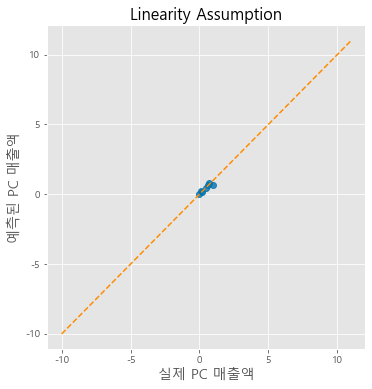

In [21]:
sns.lmplot(x='삼사PC매출', y='PC_pred', data=df_normed, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df_normed[['삼사PC매출', 'PC_pred']].min().min()-10, 
                        df_normed[['삼사PC매출', 'PC_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('예측된 PC 매출액', fontsize=14)
plt.xlabel('실제 PC 매출액', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

선형성 만족

정규성 검증

In [22]:
from scipy.stats import shapiro
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
## Shapiro-Wilks test
## 선형 모형 적합
fit = ols('삼사PC매출 ~ 마케팅비용 + 삼사모바일매출 + 코로나확진자',data=df_normed).fit()
 
## 이론상 잔차값 계산
sqrt_mse = np.sqrt(fit.mse_resid) ## square root of mse
std_res = fit.resid/sqrt_mse ## studentized residual
 
## Shapiro-Wilks 테스트의 검정통계량과 p-value를 계산한다.
shapiro_test = stats.shapiro(std_res)
 
sw_stat = shapiro_test[0] ## S-W 검정 통계량
p_value = shapiro_test[1] ## p_value

print("검정통계량:", sw_stat) # 검정통계량 값 1에 가까움
print("p값:", p_value) # 귀무가설 채택 즉, 정규성을 만족한다고 할 수 있음

검정통계량: 0.8328652381896973
p값: 0.08517052233219147


다중공선성

In [23]:
# 다중공선성 확인
df_normed["intercept"] = 0.5887
lm = sm.OLS(df_normed["삼사PC매출"],df_normed[["intercept", "삼사모바일매출", "마케팅비용", "코로나확진자", "게임시장규모"]])
results = lm.fit()
results.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x0000022B263ECFD0>>

In [24]:
y, X = dmatrices('삼사PC매출 ~  삼사모바일매출+ 마케팅비용 + 게임시장규모 + 코로나확진자', df_normed, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

# 삼사모바일 매출과 나머지 변수간의 다중공선성 확인하기. 
# vif가 10 이상이면 다중공선성이 있다고 봄. 상수항 제외 나머지 독립변수들은 vif지수가 10아래임.

,VIF Factor,features
0,26.442482,Intercept
1,8.757698,삼사모바일매출
2,25.757382,마케팅비용
3,16.139229,게임시장규모
4,54.201319,코로나확진자


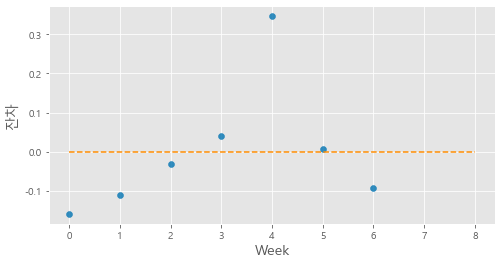

In [25]:
plt.subplots(figsize=(8, 4))
plt.scatter(x=df_normed.index, y=df_normed.residual, alpha=0.8)
plt.plot(np.repeat(0, len(df_normed.index)+2), color='darkorange', linestyle='--')

plt.ylabel('잔차', fontsize=14)
plt.xlabel('Week', fontsize=14)
plt.show()

## 정리

+ 최대한 p값이 0.05에 있는 걸로 진행해봄
+ 선형성, 정규성을 만족하였으네 ols의 VIF값과 다르게 VIF값이 10이 넘는 독립변수들이 있었음
+ 표준화 후 정규화 해서 한 번 진행해보려함